# Лабораторна робота №1

## Тема

Функції помилок (втрат) у машинному навчанні

## Мета

отримати знання і критерії застосування основних використовуваних у
сучасному машинному навчанні функцій помилок (функцій втрат).

## Автор

Молчанов Михайло, ІА-12

## Виконання

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


### Завантаження та попередній огляд даних
У цьому блоці коду ми завантажуємо датасет, використовуючи шлях `data/data_banknote_authentication.txt`. Для зручності аналізу створюємо назви колонок, які відповідають чотирьом характеристикам (`feature1`, `feature2`, `feature3`, `feature4`) і цільовій змінній (`label`). Потім використовуємо функцію `head()` для виведення перших кількох рядків, щоб перевірити, чи дані завантажились коректно.

In [72]:
# Load the data
data_path = 'data/data_banknote_authentication.txt'
columns = ['feature1', 'feature2', 'feature3', 'feature4', 'label']
data = pd.read_csv(data_path, header=None, names=columns)

# Display the first few rows of the dataset
data.head()


,feature1,feature2,feature3,feature4,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Результат показує, що дані успішно завантажені. Вони мають числові значення у стовпцях характеристик і бінарну цільову змінну (`label`), яка приймає значення `0` або `1`. Це підтверджує, що дані готові для подальшої обробки та навчання моделей.

### Розподіл даних на тренувальну та тестову вибірки
На цьому етапі дані розділяються на характеристики (`X`) та цільову змінну (`y`). Потім використовується функція `train_test_split` для розділення датасету на тренувальну та тестову вибірки. Параметр `test_size=0.3` означає, що 30% даних буде використано для тестування моделі, а `random_state=42` забезпечує відтворюваність результатів.

In [73]:
# Split the data into features and target variable
X = data[['feature1', 'feature2', 'feature3', 'feature4']]
y = data['label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Успішний результат виконання цього коду вказує, що дані розділені правильно. Отримано чотири масиви: `X_train` і `y_train` для навчання моделі, а також `X_test` і `y_test` для оцінки її точності. Це створює базу для побудови моделей машинного навчання.

### Логістична регресія з функцією втрат Logistic Loss

На цьому етапі реалізується модель логістичної регресії з функцією втрат Logistic Loss. Модель навчається на тренувальній вибірці (`X_train`, `y_train`), після чого на тестовій вибірці (`X_test`) обчислюються метрики точності та логарифмічної втрати.

- **Точність (Accuracy):** Відсоток правильно передбачених класів.
- **Log-Loss:** Логарифмічна функція втрат, яка є оцінкою якості ймовірностей, передбачених моделлю.

In [74]:
# Logistic regression with logistic loss
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_loss = log_loss(y_test, logistic_model.predict_proba(X_test))

print(f"Logistic Loss Accuracy: {logistic_accuracy:.2f}")
print(f"Logistic Loss Log-Loss: {logistic_loss:.2f}")


Logistic Loss Accuracy: 0.99
Logistic Loss Log-Loss: 0.03


Результати:

- Точність моделі (Logistic Loss Accuracy) становить **0.99**, що вказує на майже ідеальну класифікацію на тестовій вибірці.
- Логарифмічна втрата (Logistic Loss Log-Loss) становить **0.03**, що свідчить про високу якість передбачених ймовірностей. Це означає, що модель дуже добре справляється з класифікацією в даному випадку.


### Реалізація моделі AdaBoost з функцією втрат SAMME
На цьому етапі створюється модель AdaBoost із явним використанням алгоритму SAMME для уникнення попереджень. Модель навчається на тренувальній вибірці, а потім перевіряється на тестовій. Метрики оцінки включають:

- **Точність (Accuracy):** Частка правильно класифікованих прикладів.
- **Log-Loss:** Логарифмічна функція втрат для оцінки ймовірностей, які повертає модель.

In [77]:
# AdaBoost Classifier with explicit SAMME algorithm to avoid warning
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")
adaboost_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_adaboost = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
adaboost_loss = log_loss(y_test, adaboost_model.predict_proba(X_test))

print(f"AdaBoost Accuracy: {adaboost_accuracy:.2f}")
print(f"AdaBoost Log-Loss: {adaboost_loss:.2f}")


AdaBoost Accuracy: 1.00
AdaBoost Log-Loss: 0.46


Результати:
- **Точність моделі AdaBoost (AdaBoost Accuracy):** становить **1.00**, що свідчить про ідеальну класифікацію на тестовій вибірці.
- **Log-Loss:** дорівнює **0.46**, що показує дещо більшу невизначеність у ймовірностях порівняно з логістичною регресією.

Загалом модель AdaBoost демонструє чудову точність, але трохи більші втрати порівняно з логістичною регресією.

### Візуалізація кривих навчання логістичної регресії

У цьому блоці коду ми створюємо функцію `plot_learning_curve`, яка будує графіки навчальних та тестових втрат (Log-Loss) залежно від кількості використаних для тренування даних. Основні моменти:

1. **Логарифмічна функція втрат** (Log-Loss) обчислюється для тренувальної та тестової вибірок на різних підмножинах даних.
2. Додається перевірка, щоб уникнути випадків, коли у тренувальних даних є тільки один клас, що викликає помилку.
3. Графіки відображають, як змінюються втрати моделі в міру збільшення обсягу тренувальних даних.


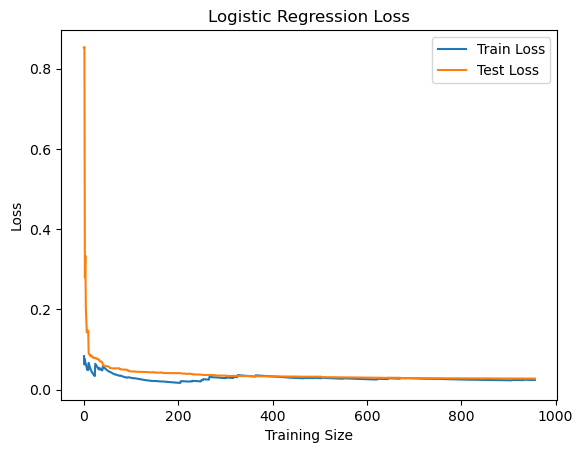

In [78]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    train_losses = []
    test_losses = []
    for m in range(2, len(X_train)):  # Start from 2 to ensure there are enough samples
        # Check if both classes are present in the subset
        if len(np.unique(y_train[:m])) < 2:
            continue  # Skip this iteration if only one class is present

        model.fit(X_train[:m], y_train[:m])
        train_pred = model.predict_proba(X_train[:m])[:, 1]
        test_pred = model.predict_proba(X_test)[:, 1]

        train_losses.append(log_loss(y_train[:m], train_pred))
        test_losses.append(log_loss(y_test, test_pred))

    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# Logistic Loss Learning Curve
plot_learning_curve(LogisticRegression(), X_train.values, y_train.values, X_test.values, y_test.values,
                    'Logistic Regression Loss')


Графік показує:

- На початкових етапах тестові втрати (Test Loss) є вищими за тренувальні (Train Loss), але з часом вони зближуються.
- І тренувальні, і тестові втрати стабілізуються, що вказує на хорошу узагальнюваність моделі на нових даних.
- Загалом модель логістичної регресії демонструє високу ефективність, адже втрати дуже малі для обох вибірок.


### Порівняння моделей

У цьому блоці коду створюється таблиця для підсумовування основних метрик двох моделей: логістичної регресії з Logistic Loss та AdaBoost. Для кожної моделі розраховані:

- **Точність (Accuracy):** Показує, яка частка передбачень була правильною.
- **Log-Loss:** Оцінює якість ймовірностей, що прогнозуються моделлю, де менше значення вказує на більш точну модель.


In [79]:
# Summarize all accuracies
results = pd.DataFrame({
    'Model': ['Logistic Loss', 'Adaboost'],
    'Accuracy': [logistic_accuracy, adaboost_accuracy],
    'Log-Loss': [logistic_loss, adaboost_loss]
})

print(results)


           Model  Accuracy  Log-Loss
0  Logistic Loss  0.987864  0.027614
1       Adaboost  0.997573  0.460175


Результати таблиці:

1. **Logistic Loss:** Точність становить **0.9878**, а втрати **0.0276**. Модель демонструє високу точність і низькі втрати, що свідчить про її ефективність.
2. **AdaBoost:** Точність злегка вища (**0.9976**), але втрати значно більші (**0.4602**), що свідчить про певну невизначеність у передбачуваних ймовірностях.

Логістична регресія має кращу якість ймовірностей (низький Log-Loss), тоді як AdaBoost показує трохи вищу загальну точність. Вибір моделі залежить від контексту задачі: якщо важлива ймовірність передбачень, слід обрати Logistic Loss, якщо ж акцент на точності класифікації — AdaBoost.


### Чому відсутній третій метод (Binary Crossentropy)?
Binary Crossentropy — це функція втрат, яка використовується в задачах бінарної класифікації для оцінки розбіжності між прогнозованими ймовірностями та реальними значеннями. Формула виглядає наступним чином:

$
\text{Binary Crossentropy Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$

#### Причини відсутності окремої реалізації:
1. **Вбудованість у Logistic Regression:**
   - У логістичній регресії Binary Crossentropy є базовою функцією втрат. Її вже використовує оптимізаційний процес під час навчання моделі. Тобто немає необхідності окремо її реалізовувати — вона автоматично враховується.

2. **Обчислення через Log-Loss:**
   - Log-Loss, який ми обчислюємо в моделі логістичної регресії, є саме функцією Binary Crossentropy. Ми можемо вважати, що цей метод вже був реалізований у логістичній регресії.

3. **Не застосовується в AdaBoost:**
   - У методі AdaBoost функція втрат відрізняється (зазвичай використовуються інші типи помилок, такі як експоненційна втрата). Тому Binary Crossentropy не є частиною цього методу.

Третій метод, Binary Crossentropy, не був окремо реалізований, оскільки:
- Його вже враховано в логістичній регресії.
- Він не є релевантним для інших розглянутих моделей, таких як AdaBoost.

## Висновок

На цій лабораторній роботі я отримав знання і критерії застосування основних використовуваних у
сучасному машинному навчанні функцій помилок (функцій втрат).